In [ ]:
import pandas as pd
import yfinance as yf
import datetime

In [ ]:
from datetime import date, timedelta
today = date.today()

In [ ]:
d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

In [ ]:
data = yf.download('GOOG',
                      start=start_date,
                      end=end_date,
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
print(data.tail())

          Date        Open        High         Low       Close   Adj Close  \
246 2023-12-06  132.899994  133.309998  131.309998  131.429993  131.429993   
247 2023-12-07  136.600006  140.000000  136.229996  138.449997  138.449997   
248 2023-12-08  135.660004  137.990005  135.570007  136.639999  136.639999   
249 2023-12-11  133.820007  134.789993  132.889999  134.699997  134.699997   
250 2023-12-12  133.270004  134.539993  132.830002  133.639999  133.639999   

       Volume  
246  16360600  
247  38419400  
248  22990900  
249  24502900  
250  26535400  


In [ ]:
data = data[["Date", "Close"]]
print(data.head())

        Date      Close
0 2022-12-13  95.849998
1 2022-12-14  95.309998
2 2022-12-15  91.199997
3 2022-12-16  90.860001
4 2022-12-19  89.150002


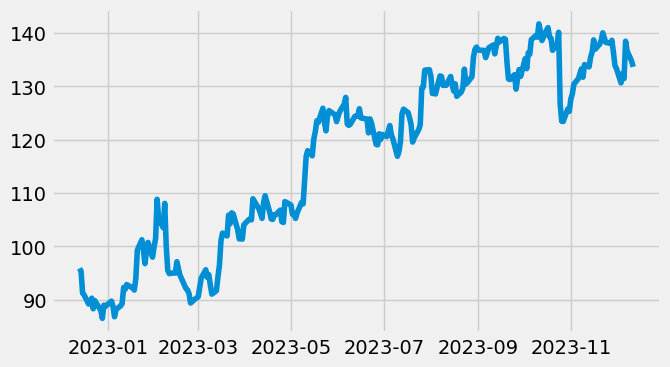

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(7, 4))
plt.plot(data["Date"], data["Close"])

<Figure size 640x480 with 0 Axes>

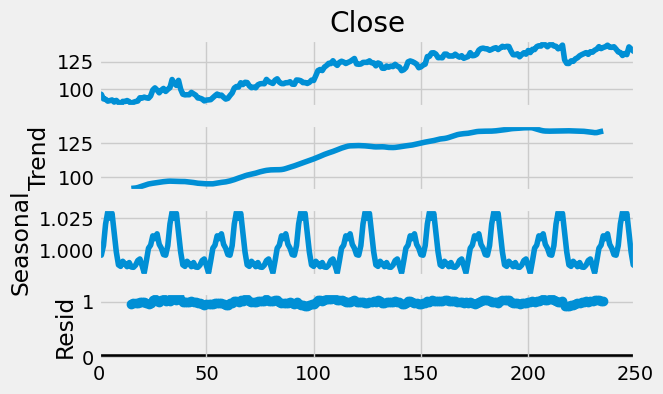

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data["Close"],model='multiplicative',period = 30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(7, 4)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

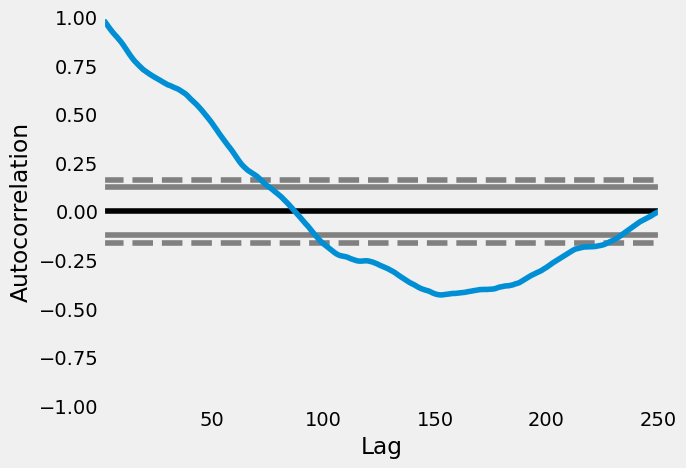

In [ ]:
pd.plotting.autocorrelation_plot(data["Close"])

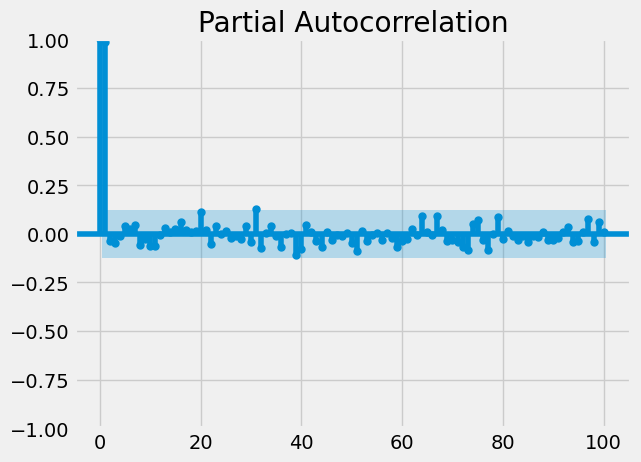

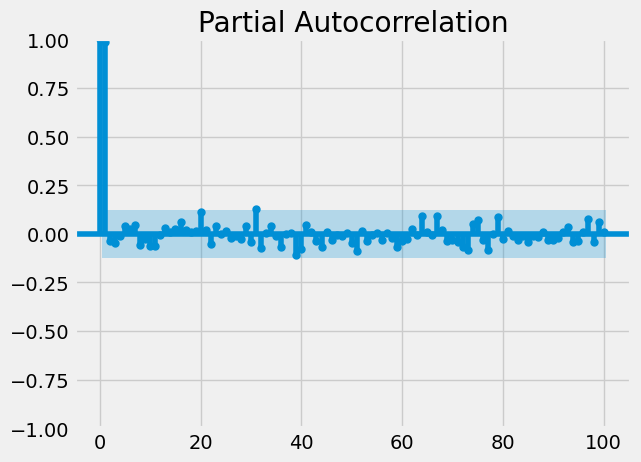

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Close"], lags = 100)

In [ ]:
train_size = int(len(data) * 0.8)
train, test = data["Close"][:train_size], data["Close"][train_size:]

In [ ]:
model_arima = ARIMA(train, order=(p, d, q))
fitted_arima = model_arima.fit()
predictions_arima = fitted_arima.predict(start=len(train), end=len(data)-1, dynamic=False)

In [ ]:
p, d, q = 5, 1, 2
from statsmodels.tsa.arima.model import ARIMA

# Assuming data is a time series
model = ARIMA(data["Close"], order=(p, d, q))
fitted = model.fit()
print(fitted.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  251
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -555.180
Date:                Wed, 13 Dec 2023   AIC                           1126.361
Time:                        16:17:32   BIC                           1154.533
Sample:                             0   HQIC                          1137.699
                                - 251                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4435      0.075     19.181      0.000       1.296       1.591
ar.L2         -1.0035      0.113     -8.857      0.000      -1.226      -0.781
ar.L3          0.0310      0.133      0.232      0.8

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
predictions = fitted.predict()
print(predictions)

0        0.000000
1       95.850014
2       95.292740
3       91.079069
4       90.967162
          ...    
246    132.686933
247    132.009300
248    139.058081
249    136.878856
250    134.686939
Name: predicted_mean, Length: 251, dtype: float64


In [ ]:
model_sarimax = sm.tsa.statespace.SARIMAX(train,
                                          order=(p, d, q),
                                          seasonal_order=(p, d, q, 12))
fitted_sarimax = model_sarimax.fit()
predictions_sarimax = fitted_sarimax.predict(start=len(train), end=len(data)-1, dynamic=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
import statsmodels.api as sm
import warnings
model=sm.tsa.statespace.SARIMAX(data['Close'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  251
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood                -546.029
Date:                            Wed, 13 Dec 2023   AIC                           1122.058
Time:                                    16:29:59   BIC                           1174.142
Sample:                                         0   HQIC                          1143.049
                                            - 251                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3452      0.238      5.664      0.000       0.880       1.811
ar.L2         -0.9026      0.243   

In [ ]:
predictions = model.predict(len(data), len(data)+10)
print(predictions)

251    134.234911
252    133.376706
253    131.504969
254    130.286814
255    131.261772
256    131.895445
257    133.229110
258    133.629951
259    133.372285
260    134.130520
261    134.295499
Name: predicted_mean, dtype: float64


<Axes: >

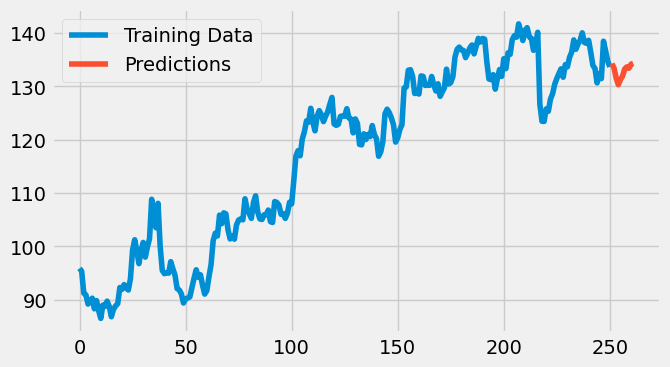

In [ ]:
data["Close"].plot(legend=True, label="Training Data", figsize=(7, 4))
predictions.plot(legend=True, label="Predictions")

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse_arima = mean_squared_error(test, predictions_arima)
mae_arima = mean_absolute_error(test, predictions_arima)
print(f"ARIMA MSE: {mse_arima}, MAE: {mae_arima}")

mse_sarimax = mean_squared_error(test, predictions_sarimax)
mae_sarimax = mean_absolute_error(test, predictions_sarimax)
print(f"SARIMAX MSE: {mse_sarimax}, MAE: {mae_sarimax}")

ARIMA MSE: 36.24836296117984, MAE: 5.292715392037621
SARIMAX MSE: 102.93633046813999, MAE: 8.761321371769434


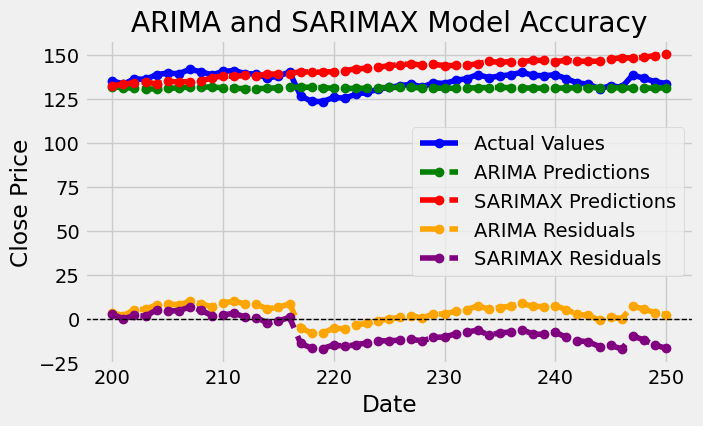

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you already have the test set and predictions for both ARIMA and SARIMAX models

# Calculate the residuals (difference between actual and predicted values)
residuals_arima = test - predictions_arima
residuals_sarimax = test - predictions_sarimax

# Plotting
plt.figure(figsize=(7,4))

# Plotting the actual values
plt.plot(test.index, test, label="Actual Values", color="blue", marker='o')

# Plotting the predicted values
plt.plot(test.index, predictions_arima, label="ARIMA Predictions", linestyle="--", color="green", marker='o')
plt.plot(test.index, predictions_sarimax, label="SARIMAX Predictions", linestyle="--", color="red", marker='o')

# Plotting residuals (accuracy)
plt.plot(test.index, residuals_arima, label="ARIMA Residuals", linestyle="--", color="orange", marker='o')
plt.plot(test.index, residuals_sarimax, label="SARIMAX Residuals", linestyle="--", color="purple", marker='o')

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)  # Zero line for reference

plt.title("ARIMA and SARIMAX Model Accuracy")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()
